<a href="https://colab.research.google.com/github/intimanjunath/Decision-trees-and-ensemble/blob/main/GradientBoosting_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

In [4]:
# Load the California Housing dataset
housing_data = fetch_california_housing()
X, y = housing_data.data, housing_data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset information
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 16512, Testing samples: 4128


Training Gradient Boosting Regressors

In [5]:
# Train XGBoost Regressor
xgboost_reg = XGBRegressor(n_estimators=120, learning_rate=0.05, max_depth=4, random_state=42)
xgboost_reg.fit(X_train, y_train)

# Predict and Evaluate
xgboost_preds = xgboost_reg.predict(X_test)
xgboost_rmse = mean_squared_error(y_test, xgboost_preds, squared=False)
print("XGBoost RMSE:", round(xgboost_rmse, 4))

XGBoost RMSE: 0.5331


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [6]:
# Train LightGBM Regressor
lightgbm_reg = LGBMRegressor(n_estimators=120, learning_rate=0.05, max_depth=4, random_state=42)
lightgbm_reg.fit(X_train, y_train)

# Predict and Evaluate
lightgbm_preds = lightgbm_reg.predict(X_test)
lightgbm_rmse = mean_squared_error(y_test, lightgbm_preds, squared=False)
print("LightGBM RMSE:", round(lightgbm_rmse, 4))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [7]:
# Train CatBoost Regressor
catboost_reg = CatBoostRegressor(iterations=120, learning_rate=0.05, depth=4, random_seed=42, verbose=0)
catboost_reg.fit(X_train, y_train)

# Predict and Evaluate
catboost_preds = catboost_reg.predict(X_test)
catboost_rmse = mean_squared_error(y_test, catboost_preds, squared=False)
print("CatBoost RMSE:", round(catboost_rmse, 4))

CatBoost RMSE: 0.586


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
# Models Dictionary
regressors = {
    "XGBoost": XGBRegressor(n_estimators=120, learning_rate=0.05, max_depth=4, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=120, learning_rate=0.05, max_depth=4, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=120, learning_rate=0.05, depth=4, random_seed=42, verbose=0)
}

# Train and Evaluate
results = []
for name, model in regressors.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    results.append({"Model": name, "RMSE": rmse})

# Convert Results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


      Model      RMSE
0   XGBoost  0.533102
1  LightGBM  0.532324
2  CatBoost  0.586036


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
!pip install seaborn

<ipython-input-14-09cac9628f24>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="RMSE", palette="viridis")


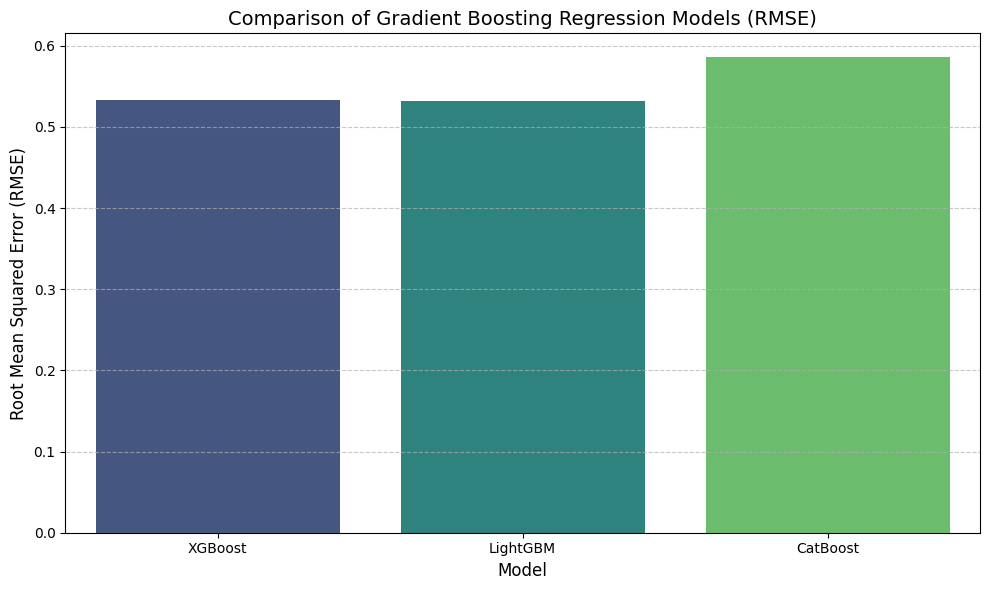

In [14]:
# Bar Plot for RMSE Comparison
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="RMSE", palette="viridis")
plt.title("Comparison of Gradient Boosting Regression Models (RMSE)", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Root Mean Squared Error (RMSE)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()